## Review the Basics

- Input Neurons : Number of features used by a neural network to make predictions
- Hidden Layers : Application of weightings to inputs to provide desired outputs
- Output Neurons : Predictions the neural network makes

Using numbers to predict another number

Example : Does the size, # of bathrooms / bedrooms, etc. effect the value of a house? Based on those variables can we make predictions about the price?

In Machine Learning algorithms are trained to understand relationships between features and make predictions about labels

## What is a Tensor?

Numerical representation of non-numerical data. Pink has no meaning as input, but .1 Red, .075 Green, and .079 Blue does if represented as [.1, .075, .079]

## How do we Improve Predicitions / Models?

- Fit on more data
- Increase hidden units : Add weightings to get desired output
- Try different activation functions : Helps decide what data is most important
- Try different optimization functions : Optimize by smoothing data to expected results
- Increase learning rate : How much to change the model based on estimated error
- Fit longer : Increase the number of times we try to fit the data

## Binary & Multi-class Classification

## Tensorflow Binary Classification

Binary classification refers to something being one thing or another.

| Hyperparameter | Binary Classification |
| :---: | :---: |
| Input Layer | Shape == number of features |
| Hidden Layers | Minimum of 1 to Unlimited |
| Neurons in Hidden Layer | Normally 10 to 100 |
| Output layer | 1 |
| Hidden activation | Usually Rectified Linear Unit (ReLU) |
| Output activation | Sigmoid |
| Loss function | BinaryCrossentropy |
| Optimizer | Stochastic Gradient Descent, Adam |

In [1]:
!pip install pandas seaborn scikit-learn

## Imports

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Used to build and deploy machine learning apps
import tensorflow as tf

# Deep Learning API for creating Neural Networks (Runs on TensorFlow)
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow import math
from keras.utils.vis_utils import plot_model

# Scikit-learn : machine learning library
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
    except RuntimeError as e:
        print(e)


## Multi-class Classification

When you have more than 2 classes it is called a multi-class classification. Build neural network to classify written numbers from 0 to 9. We'll use the Tensorflow MNIST handwritten digit database. 60,000 training examples and a test set of 10,000. 28x28 grayscale image associated with 10 classes. 

## Download Data and Split into Training & Test

In [5]:
# If using Jupyter, you can create the folders directly in the notebook
import os

# Root dataset directory
data_dir = 'data'

# Ensure the main folder and subfolders exist
os.makedirs(os.path.join(data_dir, 'basketball'), exist_ok=True)
os.makedirs(os.path.join(data_dir, 'football'), exist_ok=True)
os.makedirs(os.path.join(data_dir, 'tennis_ball'), exist_ok=True)


In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset from the directory
data_dir = 'data'  # Change to your dataset folder

# Load data and split into train/test
data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(256, 256),  # Resize images to 256x256
    batch_size=32,          # Number of images per batch
    shuffle=True            # Shuffle data
)

# Split into training and testing datasets
# Note: Adjust the split ratio as needed
train_size = int(0.8 * len(data))  # 80% for training
test_size = len(data) - train_size  # Remaining for testing

train_data = data.take(train_size)
test_data = data.skip(train_size)

"""
# Inspect the first image and label in the training dataset
for images, labels in train_data.take(1):
    plt.imshow(images[0].numpy().astype(int))
    plt.title(f"Label: {labels[0]}")
    plt.show()
"""
# Helper function to separate images and labels
def extract_images_and_labels(dataset):
    images = []
    labels = []
    for image_batch, label_batch in dataset.as_numpy_iterator():
        images.extend(image_batch)  # Append images from the batch
        labels.extend(label_batch)  # Append labels from the batch
    return np.array(images), np.array(labels)

# Extract training and testing data
X_train, y_train = extract_images_and_labels(train_data)
X_test, y_test = extract_images_and_labels(test_data)

# Check the shape of the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Found 1088 files belonging to 8 classes.
X_train shape: (864, 256, 256, 3)
y_train shape: (864,)
X_test shape: (224, 256, 256, 3)
y_test shape: (224,)


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
"""
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)
"""

"\ndatagen = ImageDataGenerator(\n    rotation_range=20,\n    width_shift_range=0.2,\n    height_shift_range=0.2,\n    zoom_range=0.2,\n    horizontal_flip=True,\n    fill_mode='nearest'\n)\n\ndatagen.fit(X_train)\n"

## View Image

In [9]:

print(np.unique(y_test))

[0 1 2 3 4 5 6]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


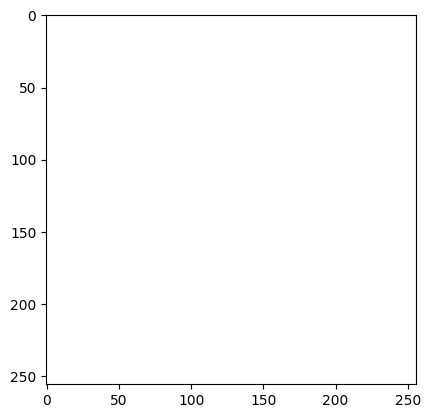

In [10]:
plt.imshow(X_train[0])
plt.show()

## Normalize the Features

In [11]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

## Show Unique values in Label Numpy Array

In [12]:
len(X_train)

864

In [13]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6])

## Store Label Names

In [14]:
label_names = np.unique(y_test)

## Build Model

In [15]:


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),  # Dropout to prevent overfitting
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),  # Dropout to prevent overfitting
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # High dropout in fully connected layers
    tf.keras.layers.Dense(16, activation='softmax')  # Output layer
])


model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(X_train, 
                      y_train,
                      epochs=25,
                      validation_data=(X_test, y_test))


Epoch 1/25
27/27 [==============================] - 13s 220ms/step - loss: 2.4742 - accuracy: 0.1285 - val_loss: 2.3259 - val_accuracy: 0.2098
Epoch 2/25
27/27 [==============================] - 6s 220ms/step - loss: 2.0807 - accuracy: 0.1759 - val_loss: 2.1361 - val_accuracy: 0.2679
Epoch 3/25
27/27 [==============================] - 6s 205ms/step - loss: 1.9730 - accuracy: 0.2431 - val_loss: 2.1985 - val_accuracy: 0.2768
Epoch 4/25
27/27 [==============================] - 6s 205ms/step - loss: 1.8543 - accuracy: 0.2836 - val_loss: 1.8474 - val_accuracy: 0.3750
Epoch 5/25
27/27 [==============================] - 5s 203ms/step - loss: 1.7484 - accuracy: 0.3391 - val_loss: 1.6641 - val_accuracy: 0.4420
Epoch 6/25
27/27 [==============================] - 6s 206ms/step - loss: 1.5858 - accuracy: 0.4167 - val_loss: 1.6056 - val_accuracy: 0.4821
Epoch 7/25
27/27 [==============================] - 5s 204ms/step - loss: 1.5003 - accuracy: 0.4618 - val_loss: 1.5667 - val_accuracy: 0.4866
Epoch

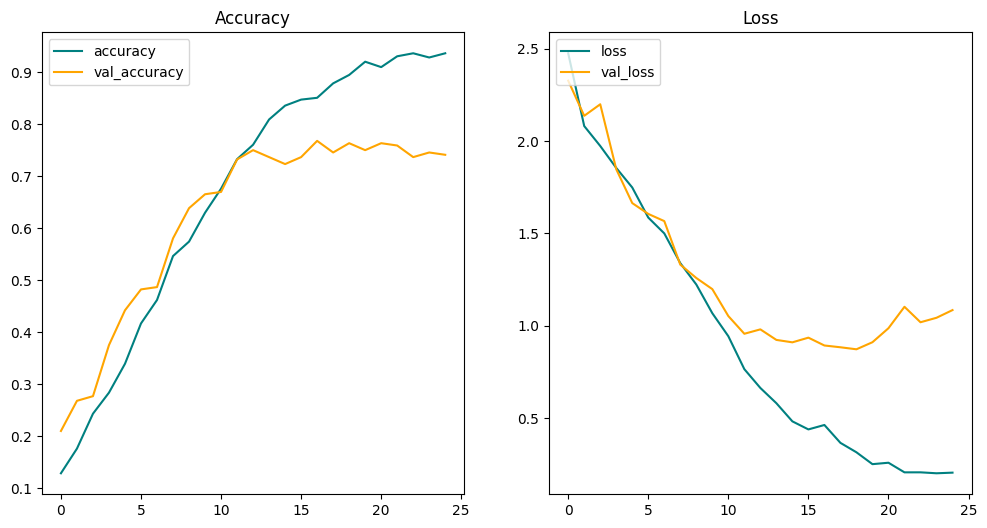

In [17]:

# Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Plot loss on the first subplot
ax1.plot(history.history['accuracy'], color='teal', label='accuracy')
ax1.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
ax1.set_title('Accuracy')  # Set title for the first subplot
ax1.legend(loc='upper left')  # Add a legend

# Plot accuracy on the second subplot
ax2.plot(history.history['loss'], color='teal', label='loss')
ax2.plot(history.history['val_loss'], color='orange', label='val_loss')
ax2.set_title('Loss')  # Set title for the second subplot
ax2.legend(loc='upper left')  # Add a legend

# Show all plots
plt.show()  # Display the plots


In [23]:
#0.0005011872336272723
optimal_lr = 0.0015848931924611134
learning_rate=optimal_lr

model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),  # Dropout to prevent overfitting
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),  # Dropout to prevent overfitting
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # High dropout in fully connected layers
    tf.keras.layers.Dense(16, activation='softmax')  # Output layer
])


model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=optimal_lr),
              metrics=["accuracy"])

# Learning rate callback
#scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_lr = model_2.fit(X_train, 
                              y_train,
                              epochs=25,
                              validation_data=(X_test, y_test))

Epoch 1/25
27/27 [==============================] - 8s 267ms/step - loss: 2.6423 - accuracy: 0.1528 - val_loss: 2.1438 - val_accuracy: 0.1295
Epoch 2/25
27/27 [==============================] - 32s 1s/step - loss: 2.0409 - accuracy: 0.1852 - val_loss: 1.9055 - val_accuracy: 0.3170
Epoch 3/25
27/27 [==============================] - 32s 1s/step - loss: 1.9091 - accuracy: 0.2488 - val_loss: 1.7560 - val_accuracy: 0.3795
Epoch 4/25
27/27 [==============================] - 31s 1s/step - loss: 1.7560 - accuracy: 0.3275 - val_loss: 1.6632 - val_accuracy: 0.3929
Epoch 5/25
27/27 [==============================] - 31s 1s/step - loss: 1.6889 - accuracy: 0.3715 - val_loss: 1.6463 - val_accuracy: 0.4241
Epoch 6/25
27/27 [==============================] - 31s 1s/step - loss: 1.5946 - accuracy: 0.4120 - val_loss: 1.5181 - val_accuracy: 0.4955
Epoch 7/25
27/27 [==============================] - 32s 1s/step - loss: 1.4999 - accuracy: 0.4444 - val_loss: 1.4478 - val_accuracy: 0.5446
Epoch 8/25
27/27 [

## Find Ideal learning Rate

In [19]:
"""
# The ideal learning rate is where the loss decreases the most
# Set random seed
tf.random.set_seed(66)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Learning rate callback
scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_lr = model_4.fit(X_train, 
                              y_train,
                              epochs=40,
                              validation_data=(X_test, y_test),
                              callbacks=[scheduler])"""

'\n# The ideal learning rate is where the loss decreases the most\n# Set random seed\ntf.random.set_seed(66)\n\n# Create the model\nmodel_4 = tf.keras.Sequential([\n  tf.keras.layers.Flatten(input_shape=(28, 28)), \n  tf.keras.layers.Dense(4, activation="relu"),\n  tf.keras.layers.Dense(4, activation="relu"),\n  tf.keras.layers.Dense(10, activation="softmax") \n])\n\n# Compile the model\nmodel_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), \n                 optimizer=tf.keras.optimizers.Adam(),\n                 metrics=["accuracy"])\n\n# Learning rate callback\nscheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))\n\n# Fit the model\nhistory_lr = model_4.fit(X_train, \n                              y_train,\n                              epochs=40,\n                              validation_data=(X_test, y_test),\n                              callbacks=[scheduler])'

## Plot to Find Ideal Learning rate

Text(0.5, 1.0, 'Learning Rate vs. Loss')

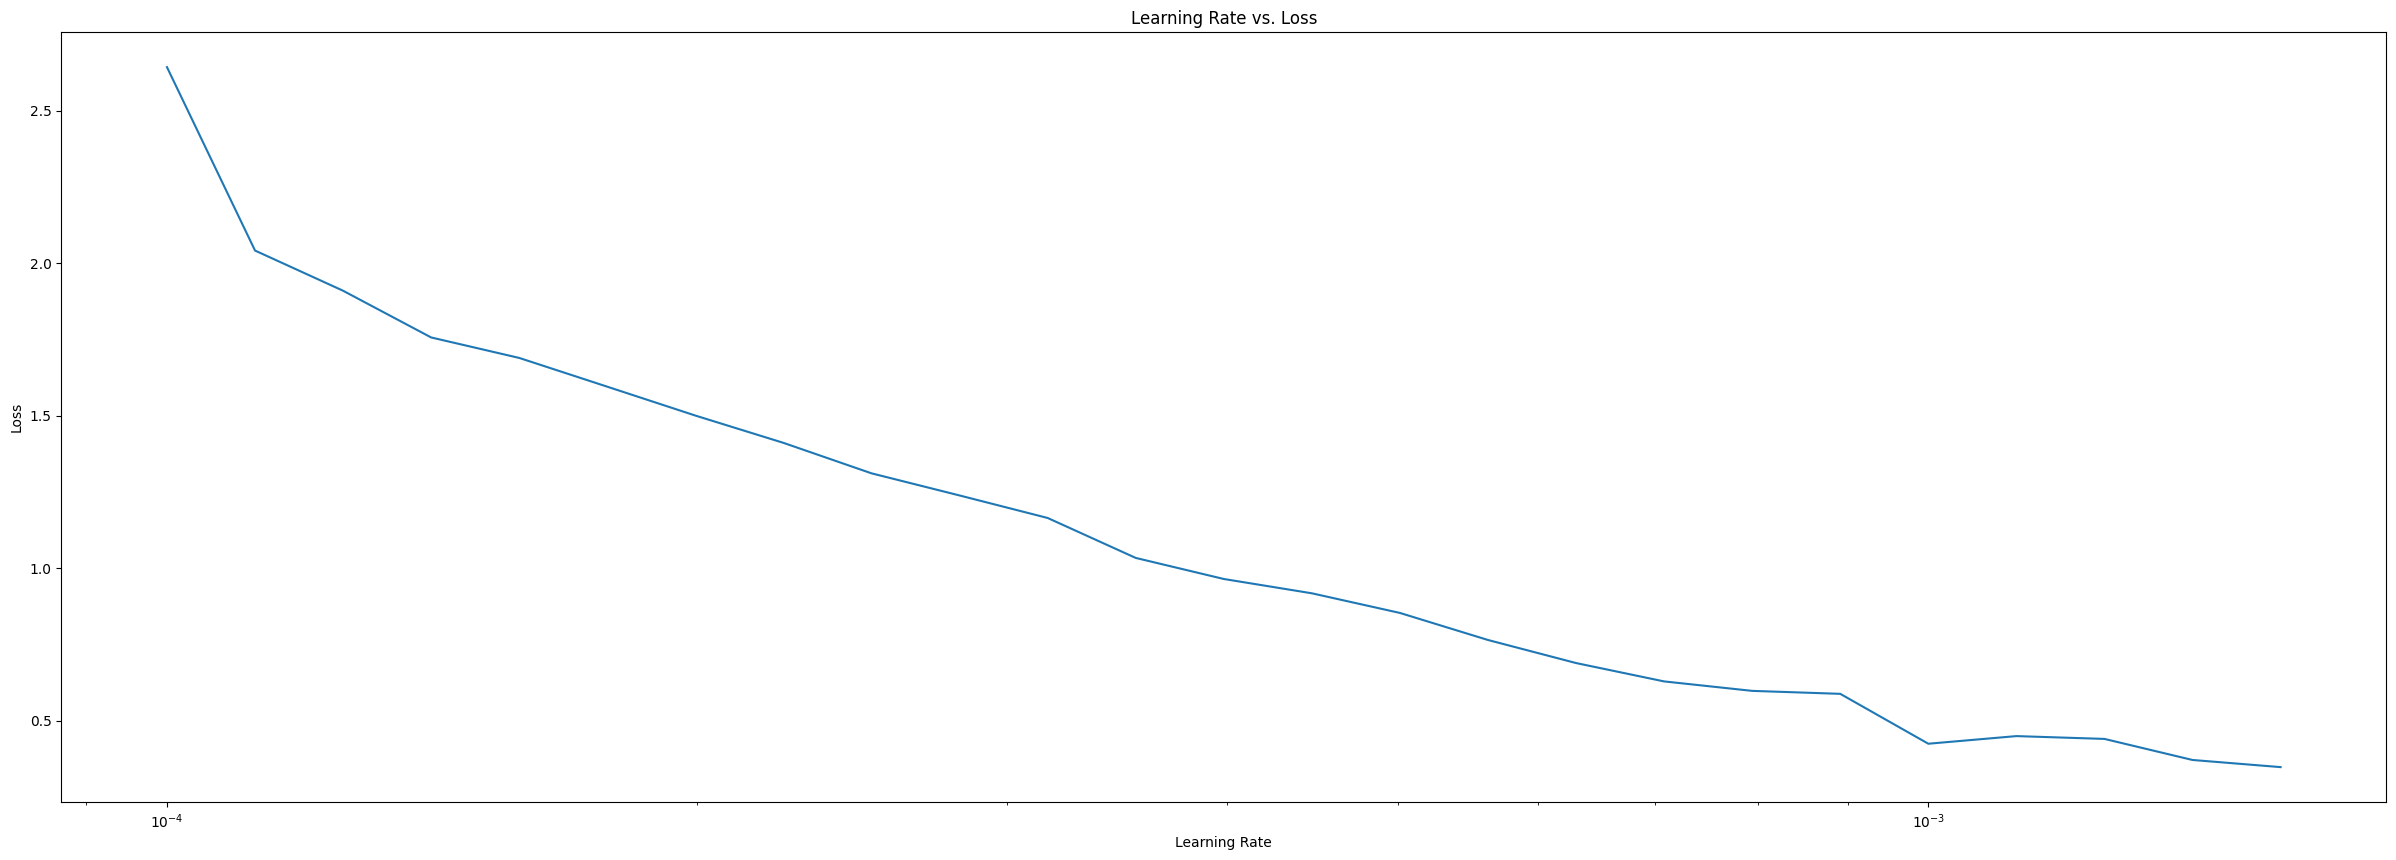

In [24]:
lrs = 1e-4 * (10 ** (tf.range(25)/20))
plt.figure(figsize=(30, 10))
plt.semilogx(lrs, history_lr.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

In [25]:
# Get the loss values from the training history
losses = np.array(history_lr.history['loss'])

# Find the index of the minimum loss (after it starts decreasing)
min_loss_idx = np.argmin(losses)

# Find the corresponding learning rate
optimal_lr = lrs[min_loss_idx]

print(f"Optimal learning rate: {optimal_lr}")


Optimal learning rate: 0.0015848931924611134


$ 10^{-3} $ or 0.001 is around the best learning rate

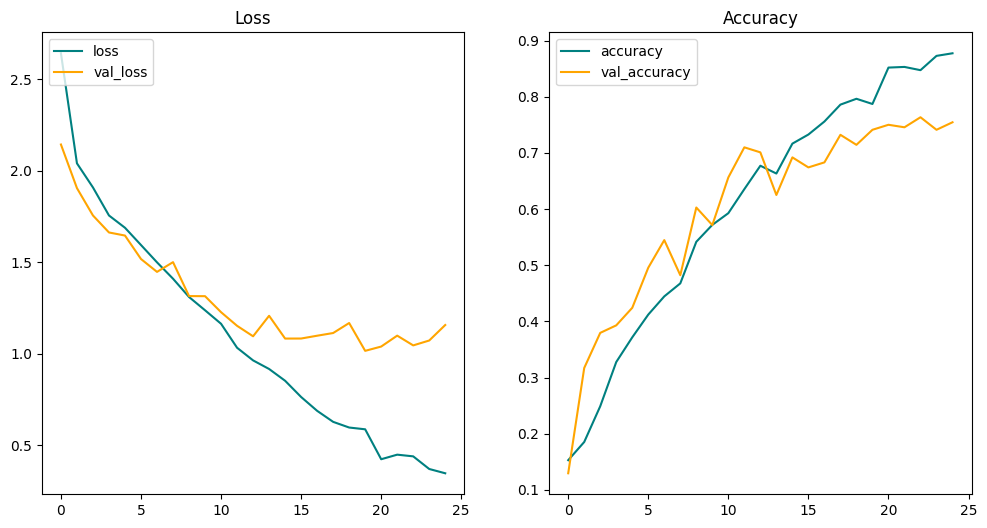

In [26]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Plot loss on the first subplot
ax1.plot(history_lr.history['loss'], color='teal', label='loss')
ax1.plot(history_lr.history['val_loss'], color='orange', label='val_loss')
ax1.set_title('Loss')  # Set title for the first subplot
ax1.legend(loc='upper left')  # Add a legend

# Plot accuracy on the second subplot
ax2.plot(history_lr.history['accuracy'], color='teal', label='accuracy')
ax2.plot(history_lr.history['val_accuracy'], color='orange', label='val_accuracy')
ax2.set_title('Accuracy')  # Set title for the second subplot
ax2.legend(loc='upper left')  # Add a legend

# Show all plots
plt.show()  # Display the plots

## Make Predictions with Model

In [37]:
# Prediction Probabilities
y_prob = model_2.predict(X_test) 
y_prob[1]

7/7 [==============================] - 4s 666ms/step


array([7.84699456e-04, 1.76032318e-03, 5.83215579e-02, 1.52093230e-03,
       9.21092629e-01, 1.77556911e-04, 1.63406432e-02, 2.70244698e-07,
       4.03040907e-08, 1.13743475e-07, 1.58009684e-07, 2.54534314e-08,
       6.19471479e-08, 4.83223346e-07, 4.60484529e-07, 5.53858159e-09],
      dtype=float32)

In [38]:

score = 0
for i in range(len(y_test)): 
    if label_names[tf.argmax(y_prob[i])] == y_test[i]: 
        
        #print(f"pred is {label_names[tf.argmax(y_prob[i])]}, actuall is {y_test[i]}")

        score +=1
    
       # print("wrong")

print(f"final score is {score/len(y_test)}")

final score is 0.7544642857142857


In [39]:
# Get the actual label name our model predicted
label_names[tf.argmax(y_prob[4])]

4

In [40]:
# Get the actual number from test label
y_test[4]

4

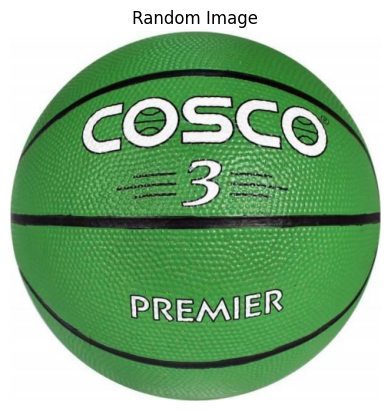

"\nimg = cv2.imread('two.jpeg')\nplt.imshow(img)\nplt.show()\n"

In [ ]:
# Initialize an empty list to store the actual labels
import cv2

image_dir = "test/basketball"

# Get list of image filenames
image_files = os.listdir(image_dir)

# Pick a random image file
random_image_file = random.choice(image_files)

# Load the random image
img = cv2.imread(os.path.join(image_dir, random_image_file))
#plt.imshow(img.numpy().astype(int))
# Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.title("Random Image")
plt.axis('off')
plt.show()

"""
img = cv2.imread('two.jpeg')
plt.imshow(img)
plt.show()
"""

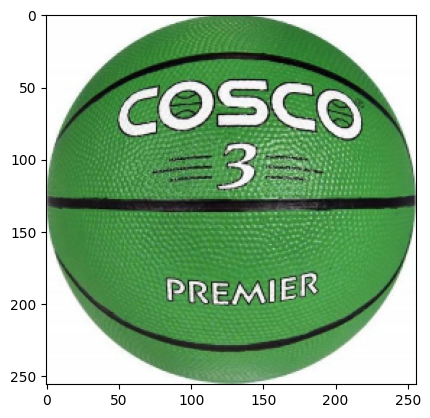

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
model_pred = model_2.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 212ms/step


In [ ]:
model_pred

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 5.8870508e-29,
        1.6592458e-37, 0.0000000e+00, 1.4804109e-28, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)